In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("../data/delaney-mordred.csv")
df = df.dropna()
y = df["logS"]
X = df.loc[:, df.columns.str.startswith("mordred_")]
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(X))

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, random_state=42)

In [14]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.cross_decomposition import PLSRegression
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

models = {
    "lasso": Lasso(alpha=0.1),
    "ridge": Ridge(alpha=0.1),
    "pls": PLSRegression(n_components=3),
    "svr": SVR(),
    "rf": RandomForestRegressor(),
    "lgbm": LGBMRegressor(),
    "xgb": XGBRegressor()
}

In [15]:
def set_plot_properties(ax):
    ax.legend()
    ax.plot([-10, 5], [-10, 5], linewidth=1, color="tab:gray")
    ax.set_xlabel("logS(true)")
    ax.set_ylabel("logS(pred)")
    ax.set_xlim(y.min(), y.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_aspect("equal")
    ax.set_xlim(-10, 5)
    ax.set_ylim(-10, 5)
    ax.legend()
    ax.grid()
    ax.label_outer()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.202361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 247097
[LightGBM] [Info] Number of data points in the train set: 846, number of used features: 1273
[LightGBM] [Info] Start training from score -3.019447
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


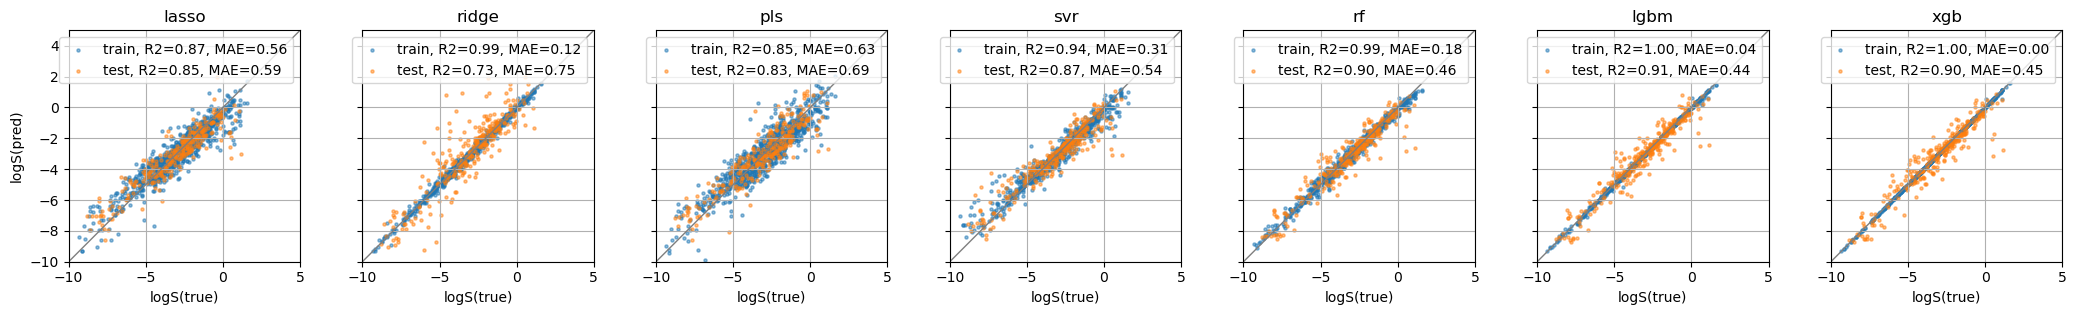

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(3*len(models), 3))

for i, (name, model) in enumerate(models.items()):
    ax = fig.add_subplot(1, len(models), i+1)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    ax.scatter(y_train, y_train_pred, s=5, alpha=0.5, label=f"train, R2={r2_train:.2f}, MAE={mae_train:.2f}")
    ax.scatter(y_test, y_test_pred, s=5, alpha=0.5, label=f"test, R2={r2_test:.2f}, MAE={mae_test:.2f}")
    set_plot_properties(ax)
    ax.set_title(name)

plt.tight_layout()
